<font size=6  color=#003366> <b>LMAPR1492-Physique des matériaux </b> <br><br> 
<b>Tache n°8</b>

<div class="alert alert-danger">
<font size=4  color=#003366>  <b> Préparation</b>
</div>

Le matériau analysé est le mp-31454 dont la formule générale est TaSbRu. 

In [1]:
from pymatgen.ext.matproj import MPRester
from pymatgen.electronic_structure.plotter import BSPlotter
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Clé API utilisée
C = "ch7bMwOoOiiVhWKKKhy"

# Obtention des informations du matériau
with MPRester(C) as m:
    structure = m.get_structure_by_material_id("mp-31454")
    bande = m.get_bandstructure_by_material_id("mp-31454")

<div class="alert alert-danger">
<font size=4  color=#003366>  <b> Structure  de bandes électroniques</b>
</div>

On cherche à obtenir un graphe représentant la structure des bandes électroniques. 

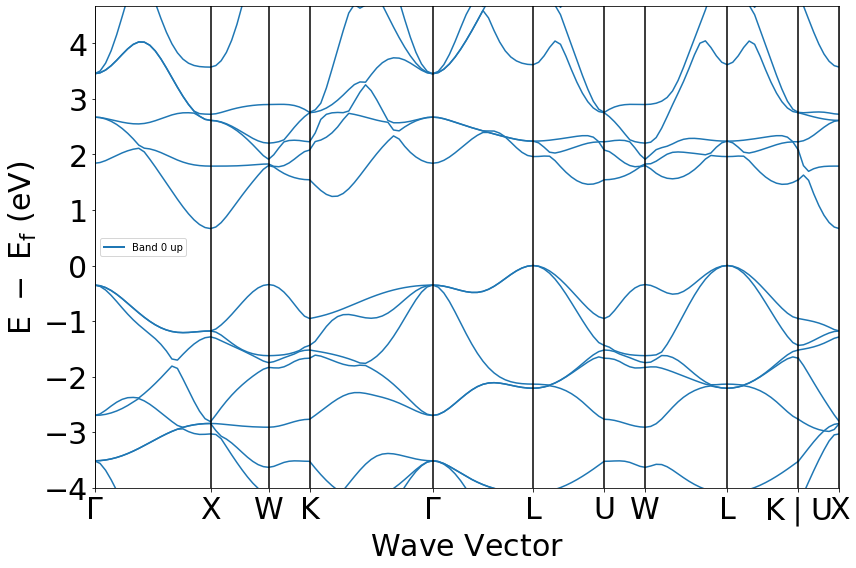

In [3]:
BGraphe = BSPlotter(bande)
BGraphe.show()

<div class="alert alert-danger">
<font size=4  color=#003366>  <b> Détermination de la bande interdite</b>
</div>

La bande interdite est indirecte et la différence d'énergie entre le manimum de la bande de conduction et le maximum de la bande de valence vaut 0.665 eV.
Le minimum de la bande de conduction se trouve en $X$ et le maximum de la bande de valance se trouve en $L$.

In [4]:
BI = bande.get_band_gap()
print("Informations sur la bande interdite : ", BI)

Informations sur la bande interdite :  {'direct': False, 'energy': 0.665, 'transition': 'L-X'}


<div class="alert alert-danger">
<font size=4  color=#003366>  <b> Direction de dispersion pour la bande de valence</b>
</div>

Les directions de plus grandes et plus faibles dispersions correspondent respectivement aux plus fortes et plus faibles pentes entre les maxima et minima locaux des courbes représentant l'énergie en fonction du vecteur d'onde.
Il est donc nécessaire de connaitre les valeurs de l'énergie en fonction du vecteur d'onde pour la dernière bande de valence et la première bande de conduction. 

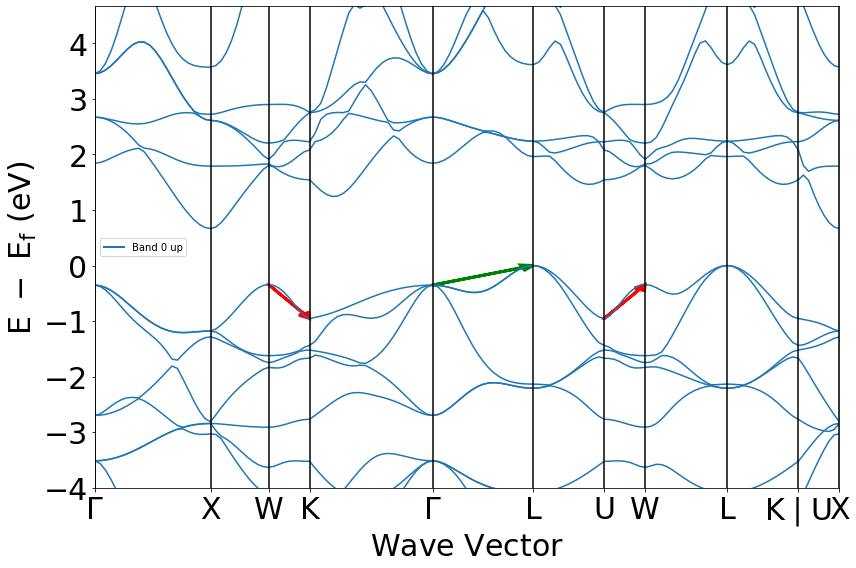

In [5]:
# Récupération des données
data = BGraphe.bs_plot_data()             

extrema = data.get('ticks')['distance']   # Récupération des valeurs des distances
labelex = data.get('ticks')['label']      # Récupération des valeurs des distances
energie = data.get('energy')['1']         # Récupération des valeurs d'énergie

# Obtention de la bande supérieure 
vbm = bande.get_vbm()
vbm = 14

# Calcul des distances entre deux extremas
npextrema = np.array(extrema)
npextrema =  np.delete(npextrema, [1,3,5,7,9,11,13,15])
distance =  npextrema[1:]-npextrema[:-1]

# Calcul de la pente 
pente = np.zeros(len(distance))
for i in range(len(distance)) :
    pente[i] = np.abs((energie[i][vbm][-1] - energie[i][vbm][0]) /distance[i])

maxi = np.max(pente)                      # La pente maximale est obtenue aux indices 2 et 6 
mini = np.min(pente)                      # La pente maximale est obtenue à l'indice 4


# Réalisation du graphe
plot = BGraphe.get_plot()
n = 2
plt.arrow(npextrema[n], energie[n][vbm][0], distance[n], energie[n][vbm][-1]-energie[n][vbm][0],
          head_width=0.1, head_length=0.1, linewidth=3, color='r', length_includes_head=True)
n = 6
plt.arrow(npextrema[n], energie[n][vbm][0], distance[n],energie[n][vbm][-1]-energie[n][vbm][0],
          head_width=0.1, head_length=0.1, linewidth=3, color='r', length_includes_head=True)
n = 4
plt.arrow(npextrema[n], energie[n][vbm][0], distance[n], energie[n][vbm][-1]-energie[n][vbm][0],
          head_width=0.1, head_length=0.1, linewidth=3, color='g', length_includes_head=True)
plt.show()

Le maximum de dispersion de la bande de valence correspont à une pente de 1.7049030.       
On obtient cette valeur en deux endroits différents à savoir entre $W$ et $K$ ainsi qu'entre $U$ et $W$.

Le minimum de dispersion de la bande de valence correspont à une pente de 0.400996 et est situé entre $\Gamma$ et $L$.

<div class="alert alert-danger">
<font size=4  color=#003366>  <b> Direction de dispersion pour la bande de conduction</b>
</div>

Les directions de plus grandes et plus faibles dispersions correspondent respectivement aux plus fortes et plus faibles pentes entre les maxima et minima locaux des courbes représentant l'énergie en fonction du vecteur d'onde.
Il est donc nécessaire de connaitre les valeurs de l'énergie en fonction du vecteur d'onde pour la dernière bande de valence et la première bande de conduction. 

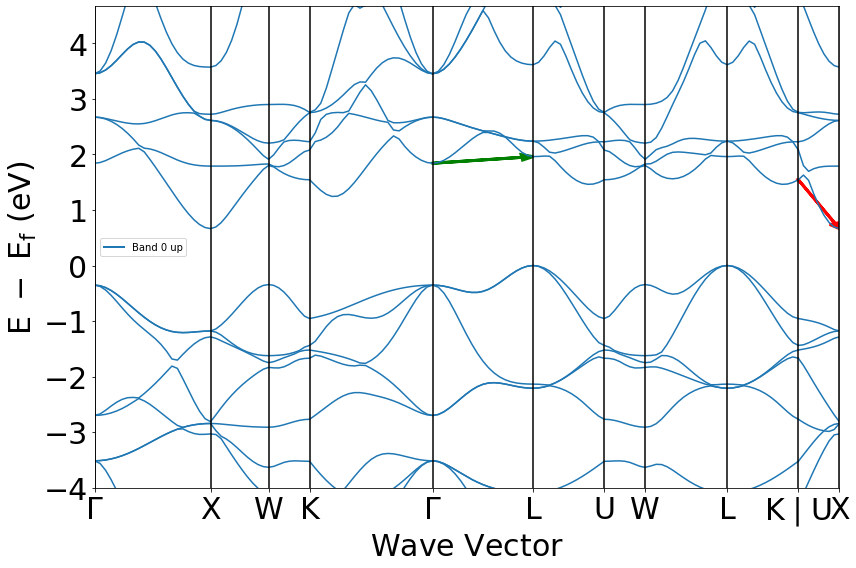

In [6]:
# Récupération des données
data = BGraphe.bs_plot_data()             

extrema = data.get('ticks')['distance']   # Récupération des valeurs des distances
labelex = data.get('ticks')['label']      # Récupération des valeurs des distances
energie = data.get('energy')['1']         # Récupération des valeurs d'énergie

# Obtention de la bande supérieure 
cbm = bande.get_cbm()
cbm = 15

# Calcul des distances entre deux extremas
npextrema = np.array(extrema)
npextrema =  np.delete(npextrema, [1,3,5,7,9,11,13,15])
distance =  npextrema[1:]-npextrema[:-1]

# Calcul de la pente 
pente = np.zeros(len(distance))
for i in range(len(distance)) :
    pente[i] =  np.abs((energie[i][cbm][-1] - energie[i][cbm][0]) /distance[i])

maxi = np.max(pente)                      # La pente maximale est obtenue à l'indice 9
mini = np.min(pente)                      # La pente maximale est obtenue à l'indice 4

# Réalisation du graphe
plot = BGraphe.get_plot()
n = 9
plt.arrow(npextrema[n], energie[n][cbm][0], distance[n], energie[n][cbm][-1]-energie[n][cbm][0],
          head_width=0.1, head_length=0.1, linewidth=3, color='r', length_includes_head=True)
n = 4
plt.arrow(npextrema[n], energie[n][cbm][0], distance[n], energie[n][cbm][-1]-energie[n][cbm][0],
          head_width=0.1, head_length=0.1, linewidth=3, color='g', length_includes_head=True)
plt.show()

Le maximum de dispersion de la bande de conduction correspont à une pente de 0.136587 et est situé entre $\Gamma$ et $L$.

Le minimum de dispersion de la bande de conduction correspont à une pente de 2.449875 et est situé entre $K|U$ et $X$.

<div class="alert alert-danger">
<font size=4  color=#003366>  <b> Calcul de la masse effective</b>
</div>

On calcule la masse effective avec la formule suivante : 

$$\frac{1}{m*} = \frac{1}{\hbar^2}\frac{\partial^2\epsilon_{k}}{\partial k^2}$$

Cette formule fait intervenir $\hbar$ qui est la constante de planck, $k$ qui représente la norme du vecteur d'onde et  $\epsilon_{k}$ qui est la fonction représentant l'énergie en fonction du vecteur d'onde. Dans cette exercice la fonction $\epsilon_{k}$ sera approximée par une parabole dont l'origine est située au maximum de la bande de valence. 

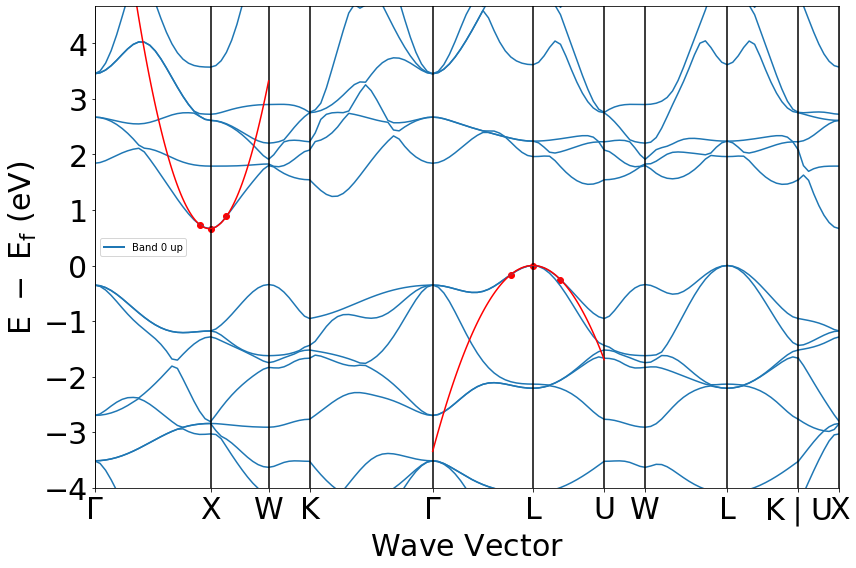

In [7]:
# Définition des constantes 
Planck = 1.054571818*10**(-34)
EvJ = 1.602176563*10**(-19)
A = 10**(-10)

# Récupération des données
distance = data.get('distances')
energie = data.get('energy')['1'] 

# Définition des points utilisés pour l'approximation
Xv = (distance[4][-5], distance[5][0], distance[5][5])
Yv = (energie[4][vbm][-5], energie[5][vbm][0], energie[5][vbm][5])
Xc = (distance[0][-3], distance[1][0], distance[1][3])
Yc = (energie[0][cbm][-3], energie[1][cbm][0], energie[1][cbm][3])

# Obtention des coefficients de la parabole
Coeffv = np.polyfit(Xv,Yv,2)
Coeffc = np.polyfit(Xc,Yc,2)

# Calcul des valeurs de l'approximation 
xv = np.linspace(npextrema[4],npextrema[6],100)
yv = Coeffv[0]*xv**2 + Coeffv[1]*xv + Coeffv[2]
xc = np.linspace(npextrema[0],npextrema[2],100)
yc = Coeffc[0]*xc**2 + Coeffc[1]*xc + Coeffc[2]

# Calcul de la masse effective à partir de la dérivée de la parabole
Ev = (2*Coeffv[0])    # Valeur de la dérivée seconde de l'énergie 
Ec = (2*Coeffc[0])
Mv = Planck**2/Ev     # Valeur de la masse effective en [J.s/(eV.Å²)]
Mc = Planck**2/Ec
Mvf = Mv/EvJ/A/A      # Valeur de la masse effective [kg]
Mcf = Mc/EvJ/A/A

# Réalisation du graphe
plot = BGraphe.get_plot()
plt.plot(xv,yv, 'r')
plt.scatter(Xv,Yv, color = 'r')
plt.plot(xc,yc, 'r')
plt.scatter(Xc,Yc, color = 'r')
plt.show()

On obtient les valeurs de la dérivée seconde à partir de l'équation obtenue pour l'approximation de la fonction par une parabole.   
Cette parabole est de type $a x^2 + bx + c$ et sa dérivée seconde vaut donc $2a$.  
On obtient alors que cette dérivée seconde vaut dans notre cas -8.7157 pour la bande de valence et 19.8660 pour la bande de conduction en $eVÅ²$.

A partir de cette valeur, nous obtenons les valeurs de masse effective de -1.276e-69 et 5.598 $[Js]$ / $[eVÅ²]$ pour la bande de valence et la bande de conduction respectivement. Cela correspond à -7.964e-31 et à 3.494e-31 $kg$. 